In [ ]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Tree Edges: [(1, 7), (2, 4), (3, 4), (4, 7), (5, 7), (6, 5)]


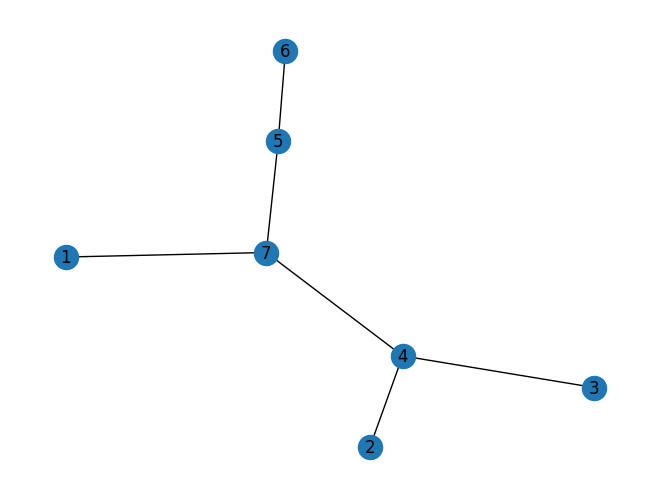

In [ ]:
G=nx.Graph()
edges=[(1,7),(2,4),(3,4),(4,7),(5,7),(6,5)]
G.add_edges_from(edges)
nx.draw(G,with_labels=True)
print("Tree Edges:" ,edges)

In [ ]:
def prufer_encode(G):
  tree=G.copy()
  prufer_sequence=[]

  while len(tree.nodes())>2:
    leaves=[node for node in tree.nodes() if tree.degree(node)==1]
    leaf=min(leaves)
    neighbor = list(tree.neighbors(leaf))[0]
    prufer_sequence.append(neighbor)
    tree.remove_node(leaf)
  return prufer_sequence

In [ ]:
sequence=prufer_encode(G)
print("Prufer Sequence:",sequence)

Prufer Sequence: [7, 4, 4, 7, 5]


In [16]:
def prufer_decode(prufer_sequence):
  n = len(prufer_sequence)+2
  # The number of vertices in the original tree is len(prufer_sequence) + 2
  vertices = list(range(1, n + 1))

  freq = {i: 0 for i in vertices}
  for node in prufer_sequence:
    freq[node] += 1

  edges = []
  for node in prufer_sequence:
    # Find the smallest vertex with frequency 0
    leaf = min(v for v in vertices if freq[v] == 0)
    edges.append((leaf, node))
    freq[node] -= 1
    freq[leaf] += 1 # Increment frequency of the leaf after adding the edge

  # The last two remaining vertices are the ones with frequency 0
  remaining = [v for v in vertices if freq[v] == 0]
  edges.append((remaining[0], remaining[1]))

  return edges

In [17]:
edges=prufer_decode(sequence)
print("Edges:",edges)

Edges: [(1, 7), (2, 4), (3, 4), (4, 7), (6, 5), (5, 7)]
